## Mapa das escolas do RS por taxa de distorção de série

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
%matplotlib inline

In [5]:
df = pd.read_csv('taxadistorcao2013.csv', encoding='latin1',skiprows=1)

In [6]:
df.head()

,Município,ibge,latitude,longitude,/Educação/Ens...de Série/Total 2013 (-)
0,Aceguá,4300034,-31.86076,-54.16706,"25,7"
1,Água Santa,4300059,-28.16720,-52.03100,"14,7"
2,Agudo,4300109,-29.64470,-53.25150,"26,4"
3,Ajuricaba,4300208,-28.23420,-53.77570,"24,1"
4,Alecrim,4300307,-27.65790,-54.76490,"18,9"


In [10]:
# renomeando coluna
df.rename(columns={'/Educação/Ens...de Série/Total 2013 (-)':'tx_distorcao'},inplace=True)
df.head()

,Município,ibge,latitude,longitude,tx_distorcao
0,Aceguá,4300034,-31.86076,-54.16706,"25,7"
1,Água Santa,4300059,-28.16720,-52.03100,"14,7"
2,Agudo,4300109,-29.64470,-53.25150,"26,4"
3,Ajuricaba,4300208,-28.23420,-53.77570,"24,1"
4,Alecrim,4300307,-27.65790,-54.76490,"18,9"


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 5 columns):
Município       495 non-null object
ibge            495 non-null int64
latitude        495 non-null float64
longitude       495 non-null float64
tx_distorcao    495 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 19.4+ KB


In [14]:
# Taxa de distorção está em formato de texto, precisamos arrumar isso
df['tx_distorcao'] = df['tx_distorcao'].str.replace(',','.')
df.head()

,Município,ibge,latitude,longitude,tx_distorcao
0,Aceguá,4300034,-31.86076,-54.16706,25.7
1,Água Santa,4300059,-28.16720,-52.03100,14.7
2,Agudo,4300109,-29.64470,-53.25150,26.4
3,Ajuricaba,4300208,-28.23420,-53.77570,24.1
4,Alecrim,4300307,-27.65790,-54.76490,18.9


In [15]:
df['tx_distorcao']=df['tx_distorcao'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 5 columns):
Município       495 non-null object
ibge            495 non-null int64
latitude        495 non-null float64
longitude       495 non-null float64
tx_distorcao    495 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.4+ KB


In [16]:
# 10 municipios com menor taxa de distorção
df.nsmallest(10,'tx_distorcao')

,Município,ibge,latitude,longitude,tx_distorcao
490,Vista Alegre do Prata,4323606,-28.8052,-51.7946,2.6
375,Santo Antônio do Palma,4317558,-28.4956,-52.0267,4.3
28,Áurea,4301552,-27.6936,-52.0505,5.8
268,Nicolau Vergueiro,4312674,-28.5298,-52.4676,7.0
128,Derrubadas,4306320,-27.2642,-53.8645,7.4
119,Cotiporã,4305959,-28.9891,-51.6971,7.5
68,Campestre da Serra,4303673,-28.7926,-51.0941,7.6
476,Vanini,4322558,-28.4758,-51.8447,7.8
236,Linha Nova,4311643,-29.4679,-51.2003,8.0
392,São José do Inhacorá,4318499,-27.7251,-54.1275,8.0


In [17]:
# 10 municipios com maior taxa de distorção
df.nlargest(10,'tx_distorcao')

,Município,ibge,latitude,longitude,tx_distorcao
307,Pedras Altas,4314175,-31.7217,-53.5838,56.0
316,Pinheiro Machado,4314506,-31.5794,-53.3798,53.9
17,Arambaré,4300851,-30.9093,-51.5046,52.8
140,Eldorado do Sul,4306767,-30.0847,-51.6187,51.9
35,Barra do Quaraí,4301875,-30.2029,-57.5497,51.5
393,São José do Norte,4318507,-32.0151,-52.0331,49.4
413,São Valério do Sul,4319737,-27.7906,-53.9368,49.2
193,Hulha Negra,4309654,-31.4067,-53.8667,49.0
106,Chuí,4305439,-33.6866,-53.4594,48.6
233,Lavras do Sul,4311502,-30.8071,-53.8931,47.7


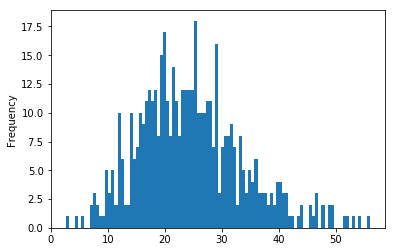

In [19]:
# Plotando um histograma da taxa de distorção
df['tx_distorcao'].plot.hist(bins=100)

In [21]:
# Quantidade de municipios com taxa de distorção menor ou igual a 10
df[df['tx_distorcao']<=10].count()

Município       17
ibge            17
latitude        17
longitude       17
tx_distorcao    17
dtype: int64

In [23]:
df[df['tx_distorcao']<=10]

,Município,ibge,latitude,longitude,tx_distorcao
28,Áurea,4301552,-27.6936,-52.0505,5.8
47,Boa Vista do Sul,4302253,-29.3544,-51.6687,9.6
68,Campestre da Serra,4303673,-28.7926,-51.0941,7.6
69,Campina das Missões,4303707,-27.9888,-54.8417,8.8
119,Cotiporã,4305959,-28.9891,-51.6971,7.5
128,Derrubadas,4306320,-27.2642,-53.8645,7.4
133,Dois Lajeados,4306452,-28.9830,-51.8396,9.9
236,Linha Nova,4311643,-29.4679,-51.2003,8.0
268,Nicolau Vergueiro,4312674,-28.5298,-52.4676,7.0
274,Nova Bréscia,4313003,-29.2182,-52.0319,10.0


In [22]:
# Quantidade de municipios com taxa de distorção maior ou igual a 45
df[df['tx_distorcao']>=45].count()

Município       17
ibge            17
latitude        17
longitude       17
tx_distorcao    17
dtype: int64

In [24]:
df[df['tx_distorcao']>=45]

,Município,ibge,latitude,longitude,tx_distorcao
17,Arambaré,4300851,-30.90930,-51.50460,52.8
30,Balneário Pinhal,4301636,-30.24190,-50.23360,46.7
35,Barra do Quaraí,4301875,-30.20290,-57.54970,51.5
63,Caibaté,4303301,-28.29050,-54.64540,46.6
84,Capão do Leão,4304663,-31.75650,-52.48890,46.1
106,Chuí,4305439,-33.68660,-53.45940,48.6
140,Eldorado do Sul,4306767,-30.08470,-51.61870,51.9
193,Hulha Negra,4309654,-31.40670,-53.86670,49.0
219,Jacuizinho,4310876,-29.02200,-53.05370,45.6
233,Lavras do Sul,4311502,-30.80710,-53.89310,47.7


In [26]:
# Entendendo o folium
brasil = folium.Map(
    location=[-13.6584755,-69.7015428], # coordenadas do google maps
    zoom_start=4
)

# Mostrando o mapa
brasil

In [34]:
# Agora vamos criar o mapa do RS
rs = folium.Map(
    #location=[-30.3293299,-58.1636039],
    location=[-30.5,-52], # coordenadas ajustadas
    zoom_start=6
)
rs

In [36]:
# Percorrer o dataframe com base nas melhores escolas (tx_distorcao <= 10)
# e desenhar um marcador para cada escola usando for e iterrows
for indice, municipio in df[df['tx_distorcao']<=10].iterrows():
    folium.Marker(
        location=[municipio['latitude'],municipio['longitude']],
        popup=municipio['Município'],
        icon=folium.map.Icon(color='green')
    ).add_to(rs)
rs

In [37]:
for indice, municipio in df[df['tx_distorcao']>=45].iterrows():
    folium.Marker(
        location=[municipio['latitude'],municipio['longitude']],
        popup=municipio['Município'],
        icon=folium.map.Icon(color='red')
    ).add_to(rs)
rs

In [38]:
# Qual a taxa de distorção de Porto Alegre?
df[df['Município']=='Porto Alegre']['tx_distorcao']

325    32.3
Name: tx_distorcao, dtype: float64